**For the iris dataset perform the ANOVA testing to prove the assumption about “means of sepal_width for all the  categories of & quot; species & quot; is different”.**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

In [ ]:
from sklearn.datasets import load_iris
irisData = load_iris()

In [ ]:
irisData.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
df=pd.DataFrame(irisData.data, columns=irisData.feature_names)

In [ ]:
irisData.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
pd.set_option('display.max.columns',None)

In [ ]:
df1=pd.DataFrame(irisData.target_names)

In [ ]:
df['target']=irisData.target

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
df.target=df.target.replace(0,'setosa')
df.target=df.target.replace(1,'versicolor')
df.target=df.target.replace(2,'virginica')

In [ ]:
df['target'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
df["sepal width (cm)"].groupby(df['target']).size()

target
setosa        50
versicolor    50
virginica     50
Name: sepal width (cm), dtype: int64

In [ ]:
s1=df[df['target']=='setosa']['sepal length (cm)']

In [ ]:
ve1=df[df['target']=='versicolor']['sepal length (cm)']

In [ ]:
vi1=df[df['target']=='virginica']['sepal length (cm)']

In [ ]:
s1.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length (cm), dtype: float64

In [ ]:
#'sepal length (cm)'
a=list(s1)
b=list(ve1)
c=list(vi1)

In [ ]:
list(df['target'].unique())

['setosa', 'versicolor', 'virginica']

In [ ]:
df4=pd.DataFrame(list(zip(a,b,c)),columns=list(df['target'].unique()))
df4.head()

,setosa,versicolor,virginica
0,5.1,7.0,6.3
1,4.9,6.4,5.8
2,4.7,6.9,7.1
3,4.6,5.5,6.3
4,5.0,6.5,6.5


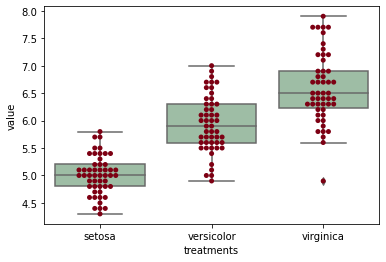

In [ ]:
# reshape the d dataframe suitable for statsmodels package 
df_melt = pd.melt(df4.reset_index(), id_vars=['index'], value_vars=list(df['target'].unique()))
# replace column names
df_melt.columns = ['index', 'treatments', 'value']

# generate a boxplot to see the data distribution by treatments. 
# Using boxplot, we can easily detect the differences between different treatments
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.boxplot(x='treatments', y='value', data=df_melt, color='#99c2a2')
ax = sns.swarmplot(x="treatments", y="value", data=df_melt, color='#7d0013')
plt.show()

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

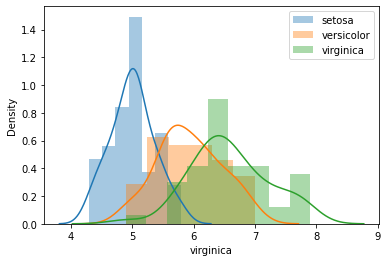

In [ ]:
sns.distplot(df4["setosa"], label = "setosa")
sns.distplot(df4["versicolor"], label = "versicolor")
sns.distplot(df4["virginica"], label = "virginica")
plt.legend();

In [ ]:
!pip install bioinfokit

In [ ]:
list(df4.columns)

['setosa', 'versicolor', 'virginica']

**Null hypothesis: Groups of sepal length (cm) means are equal (no variation in means of groups of sepal length (cm))**

**H0: μ1=μ2=…=μp**

**Alternative hypothesis: At least, one group of sepal length (cm) mean is different from other groups of sepal length (cm)**

**H1: All μ are not equal.**

In [ ]:
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(df4[df4.columns[0]],df4[df4.columns[1]],df4[df4.columns[2]])
print(fvalue, pvalue)

119.26450218450468 1.6696691907693826e-31


In [ ]:
# Ordinary Least Squares (OLS) model
model = ols('value ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(treatments),63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


In [ ]:
# ANOVA table using bioinfokit v1.0.3 or later (it uses wrapper script for anova_lm)
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df_melt, res_var='value', anova_model='value ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),2.0,63.212133,31.606067,119.264502,1.669669e-31
Residual,147.0,38.956200,0.265008,NaN,NaN


**The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.**

In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
from bioinfokit.analys import stat
# perform multiple pairwise comparison (Tukey's HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=df_melt, res_var='value', xfac_var='treatments', anova_model='value ~ C(treatments)')
res.tukey_summary

C:\Users\ankur\anaconda3\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,setosa,versicolor,0.930,0.686209,1.173791,12.774336,0.001
1,setosa,virginica,1.582,1.338209,1.825791,21.730107,0.001
2,versicolor,virginica,0.652,0.408209,0.895791,8.955771,0.001


**Above results from Tukey’s HSD suggests that, all other pairwise comparisons for treatments rejects null hypothesis (p < 0.05) and indicates statistical significant differences.**

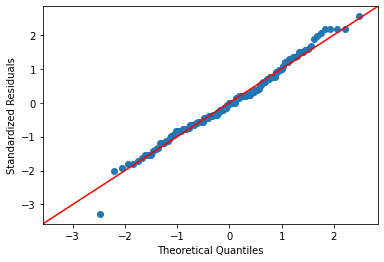

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


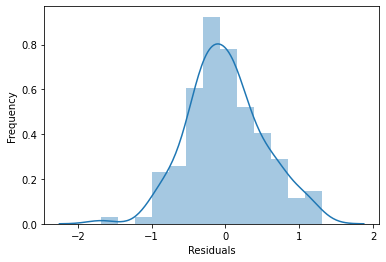

In [ ]:
# QQ-plot
# res.anova_std_residuals are standardized residuals obtained from ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
sns.distplot(res.anova_model_out.resid) 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

**the standardized residuals lie around the 45-degree line, it suggests that the residuals are approximately normally distributed**

**In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed**

**Shapiro-Wilk test can be used to check the normal distribution of residuals.**
 
**Null hypothesis: data is drawn from normal distribution.**

In [ ]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.987898051738739 0.21889623999595642


**As the p value is significant, we reject null hypothesis and conclude that data is not drawn from normal distribution.**

**As the data is not drawn from normal distribution Levene’s test can be used to check the Homogeneity of variances.**

In [ ]:
# if you have a stacked table, you can use bioinfokit v1.0.3 or later for the Levene's test
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_melt, res_var='value', xfac_var='treatments')
res.levene_summary

,Parameter,Value
0,Test statistics (W),6.3527
1,Degrees of freedom (Df),2.0000
2,p value,0.0023


**As the p value is non significant, we fail to reject null hypothesis and conclude that data have Homogeneity of variances**

**FOR THE NOTEBOOK**

**Q1. Perform The Ztest For 1 Sample And Proportion Using Standard Libraries**

**Q2. Also Analysis Visualization For The Same.**

## **Analyzing the average heights of NBA Players**

In [ ]:
df2 = pd.read_csv('D:\\CDAC\\Github\\Data_Analytics\\Anova_Hypothesis_Two_Sample_Testing\\players.csv')
df2.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,16,24,66.7,6,26,32,46,7,0,14,15,110,3.29,0.50,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,145,174,83.3,32,134,166,261,54,15,157,189,791,1.66,0.34,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,44,61,72.1,46,123,169,33,21,22,38,83,318,0.87,0.55,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,30,46,65.2,48,114,162,30,19,9,44,88,244,0.68,0.43,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,107,141,75.9,131,413,544,244,68,98,100,121,1530,2.44,0.68,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [ ]:
df2.shape

(490, 34)

#### Hypothesis Testing

One Sample Significance Test for Mean is extremely similar to that for Proportion. We will go through almost an identical process.

The hypotheses are defined as follows:
* **Null Hypothesis**: The average height of an NBA player is 200.66 cm.
* **Alternate Hypothesis**: The average height of an NBA player is not 200.66 cm.

Significance Level, $\alpha$ is at 0.05. Assuming Null Hypothesis to be true.

In [ ]:
h0_mean = 200.66   #google search
t= df2['Height'].dropna()

In [ ]:
h1_mean = t.mean()                      #z=(x-mu)/sig/sqrt(n)
h1_mean                                 #z=(x-mu)/sigma

197.44075829383885

In [ ]:
sigma = t.std()/np.sqrt(len(df2['Height']))
sigma

0.3948442447237618

In [ ]:
z = (h1_mean - h0_mean)/sigma
z

-8.15319394718129

In [ ]:
#p_val = (1 - stats.norm.cdf(abs(z))) #ONE TAIL  I.E LOWER TAIL PART
p_val = (1 - stats.norm.cdf(abs(z)))*2   #TWO TAIL            #pval or prob value             pval<alpha
p_val

4.440892098500626e-16

In [ ]:
sm.stats.ztest(df2['Height'].dropna() ,value=200.66)

(-7.566341847897391, 3.838810356044806e-14)

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


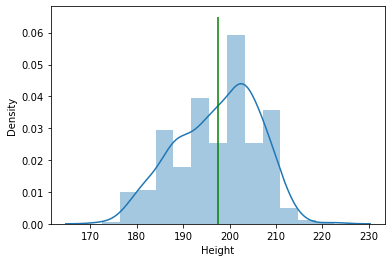

In [ ]:
sns.distplot(t)
plt.vlines(h1_mean,ymin=0,ymax=.065,color='g')

**The p value obtained is much lesser than the significance level $\alpha$. We therefore reject the null hypothesis and accept the alternate hypothesis (the negation). We can therefore arrive at the following conclusion from this analysis:**

**The average height of NBA Players is NOT 6'7"**.

# Analyzing DEPRESSION in India by Gender

Are men as likely to commit suicide as women?

This is the question we will attempt at answering in this section. To answer this question, we will use suicide statistics shared by the National Crime Records Bureau (NCRB), Govt of India. To perform this analysis, we need to know the sex ratio in India. The Census 2011 report states that there are 940 females for every 1000 males in India.

Let p denote the fraction of women in India.

# H0:MEN AND WOMEN  ARE EQUALLY LIKELY TO DEPRESS    (NULL)
# H1:MEN AND WOMEN  ARE  NOT EQUALLY LIKELY TO DEPRESS  (ALTERNATE)


In [ ]:
p1 = 940/(940+1000)   # Female population proportion       
p1 

0.4845360824742268

In [ ]:
df1 = pd.read_excel('D:\\CDAC\\Github\\Data_Analytics\\Anova_Hypothesis_Two_Sample_Testing\\Suicides.xlsx')
df1.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [ ]:
df1.shape

(237519, 7)

In [ ]:
df1['Gender'].value_counts()

Male      118879
Female    118640
Name: Gender, dtype: int64

#### Step 2: Decide on the Statsitical Test

We will be using the One Sample Z-Test here.

#### Step 3: Compute the p-value

In [ ]:
h0_prop1 = p1
h0_prop1

0.4845360824742268

In [ ]:
h1_prop1 = df1['Gender'].value_counts()['Female']/len(df1['Gender'])
h1_prop1

0.49949688235467476

In [ ]:
sigma_prop1 = np.sqrt((h0_prop1 * (1 - h0_prop1))/len(df1['Gender']))
sigma_prop1

0.0010254465276083747

In [ ]:
z1 = (h1_prop1 - h0_prop1)/sigma_prop1
z1

14.589546580591277

In [ ]:
p_val1 = (1-stats.norm.cdf(z1))*2       # pval<aplha
p_val1

0.0

**The p value obtained is much lesser than the significance level  α . We therefore reject the null hypothesis and accept the alternate hypothesis (the negation). We can therefore arrive at the following conclusion from this analysis:MEN AND WOMEN ARE NOT EQUALLY LIKELY TO DEPRESS.**

In [ ]:
sm.stats.proportions_ztest(df1['Gender'].value_counts()['Female'],len(df1['Gender']) ,value=p1,alternative='larger')

(14.58257461704968, 1.8129020725130917e-48)

<AxesSubplot:xlabel='Gender', ylabel='count'>

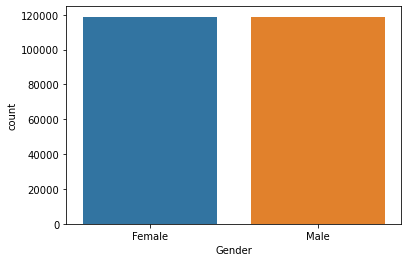

In [ ]:
sns.countplot(x='Gender',data=df1)

In [ ]:
df1['Gender'].value_counts()

Male      118879
Female    118640
Name: Gender, dtype: int64

# Analyzing Literacy Rates

Two Sample test

In [ ]:
df3 = pd.read_csv('D:\\CDAC\\Github\\Data_Analytics\\Anova_Hypothesis_Two_Sample_Testing\\cities.csv')
df3.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,103319,58347,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,92433,49347,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,83955,46295,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,125985,71470,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,101292,56203,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [ ]:
df3['state_name'].value_counts()

UTTAR PRADESH                63
WEST BENGAL                  61
MAHARASHTRA                  43
ANDHRA PRADESH               42
MADHYA PRADESH               32
TAMIL NADU                   32
GUJARAT                      29
RAJASTHAN                    29
BIHAR                        26
KARNATAKA                    26
HARYANA                      20
PUNJAB                       16
NCT OF DELHI                 15
ORISSA                       10
JHARKHAND                    10
CHHATTISGARH                  9
KERALA                        7
UTTARAKHAND                   6
ASSAM                         4
JAMMU & KASHMIR               3
PUDUCHERRY                    2
MANIPUR                       1
MEGHALAYA                     1
ANDAMAN & NICOBAR ISLANDS     1
CHANDIGARH                    1
NAGALAND                      1
TRIPURA                       1
MIZORAM                       1
HIMACHAL PRADESH              1
Name: state_name, dtype: int64

In [ ]:
punjab = df3[df3['state_name'] == 'PUNJAB']['effective_literacy_rate_total']
delhi = df3[df3['state_name'] == 'NCT OF DELHI']['effective_literacy_rate_total']

In [ ]:
punjab_mean = punjab.mean()
punjab_std = punjab.std()

punjab_mean, punjab_std

(83.44062499999998, 5.381935796408821)

In [ ]:
delhi_mean = delhi.mean()
delhi_std = delhi.std()

delhi_mean, delhi_std

(83.658, 4.6569551671206195)

**From the above calculations, it can be seen that the mean and the standard deviations of Punjab and Delhi literacy rates differ slightly. The next step is to determine if this difference is a statistically significant one.**

For hypothesis testing, the following are defined:

* **Null Hypothesis:** The true mean literacy rate for Punjab and Delhi are the same.
* **Alternate Hypothesis:** The true mean literacy rate for Punjab and Delhi are not the same.

The threshold value of $\alpha$ is assumed to be 0.05.
Assuming Null Hypothesis is true.

In [ ]:
h0_mean = 0
mean_diff = delhi_mean - punjab_mean
sigma_diff = np.sqrt((delhi_std**2)/len(delhi)  + (punjab_std**2)/len(punjab))
mean_diff, sigma_diff

(0.2173750000000183, 1.8044784525904138)

Since we are dealing with sample sizes less than 30, using the t-statistic will be more appropriate. To use student's t though, we need to calculate the degree of freedom. This is done as follows:

In [ ]:
deg = (((delhi_std**2)/len(delhi)  + (punjab_std**2)/len(punjab)) ** 2) / ((((delhi_std**2)/len(delhi))**2)/(len(delhi)-1)  + (((punjab_std**2)/len(punjab))**2)/(len(punjab) - 1))
deg

28.82681788840003

In [ ]:
t2 = (mean_diff - h0_mean) / sigma_diff
t2

0.12046417051307332

In [ ]:
p2 = (1-stats.t.cdf(t2, deg))*2
p2

0.9049511804508772

**The value of p obtained here is much higher than the significance level $\alpha$. Therefore, we cannot reject the null hypothesis. It stands.**

**The true mean literacy rate for Punjab and Delhi are the same.**

In [ ]:
sm.stats.ztest(delhi ,punjab)

(0.1198880354206678, 0.9045718424630748)

C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='effective_literacy_rate_total', ylabel='Density'>

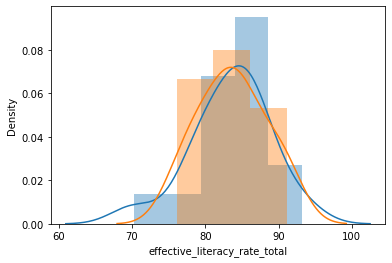

In [ ]:
sns.distplot(punjab)
sns.distplot(delhi)
